In [1]:
import pandas as pd
import json
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2
import sys
import os
sys.path.insert(0, '../')
from scripts_second_phase.tracking import MatchTracking 
from scripts_second_phase.pass_events import PassEvents

In [2]:
# Relou de toujours devoir aller chercher le nom du match correspondant dans statsbomb : création d'un mapping
tracking_to_event  = {
    'g2312201' : 'ManCity_AstonVilla',
    'g2312135' : 'ManCity_Arsenal',
    'g2312152' : 'ManCity_LeicesterCity',
    'g2312166' : 'ManCity_Liverpool',
    'g2312183' : 'ManCity_Brighton',
    'g2312213' : 'ManCity_Tottenham'
}
event_to_tracking = {v: k for k, v in tracking_to_event.items()}
event_to_tracking

{'ManCity_AstonVilla': 'g2312201',
 'ManCity_Arsenal': 'g2312135',
 'ManCity_LeicesterCity': 'g2312152',
 'ManCity_Liverpool': 'g2312166',
 'ManCity_Brighton': 'g2312183',
 'ManCity_Tottenham': 'g2312213'}

In [3]:
game = 'ManCity_Liverpool'

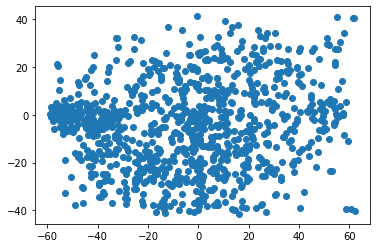

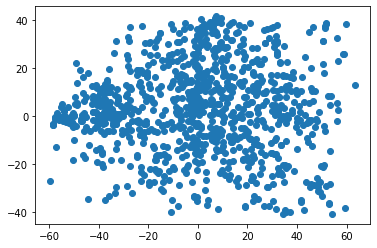

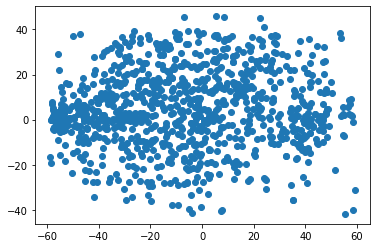

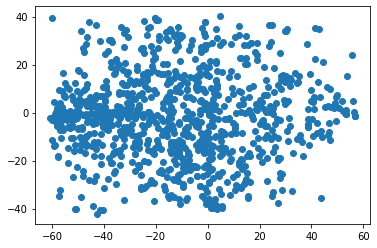

In [4]:
if True :  
    # Vérification qu'on attaque bien toujours à droite dans les données de tracking
    match_tracking = MatchTracking(tracking_file=event_to_tracking[game], event_file=game)

    df_home = match_tracking.HomeTracking.df_tracking.copy()
    df_home1 = df_home[df_home['period']==1].sample(1000)
    plt.scatter(df_home1.x,df_home1.y)
    plt.show()

    df_home2 = df_home[df_home['period']==2].sample(1000)
    plt.scatter(df_home2.x,df_home2.y)
    plt.show()

    df_away = match_tracking.AwayTracking.df_tracking.copy()
    df_away1 = df_away[df_away['period']==1].sample(1000)
    plt.scatter(df_away1.x,df_away1.y)
    plt.show()

    df_away2 = df_away[df_away['period']==2].sample(1000)
    plt.scatter(df_away2.x,df_away2.y)
    plt.show()

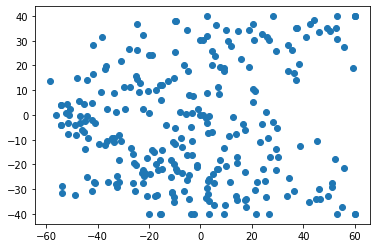

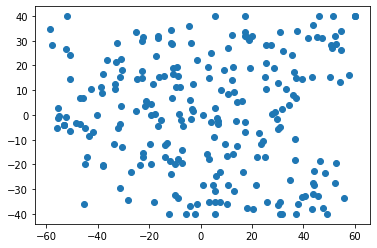

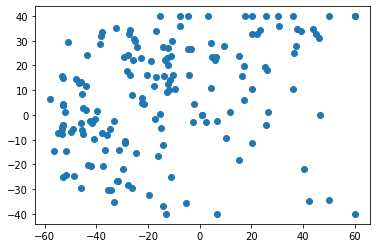

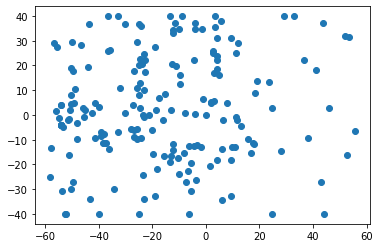

In [7]:
if True : 
    # Vérification qu'on attaque bien toujours à droite dans les données de passes
    pass_events = PassEvents(event_file=game)

    df_home = pass_events.df_pass_home.copy()
    df_home1 = df_home[df_home['period']==1]
    plt.scatter(df_home1.x,df_home1.y)
    plt.show()

    df_home2 = df_home[df_home['period']==2]
    plt.scatter(df_home2.x,df_home2.y)
    plt.show()

    df_away = pass_events.df_pass_away.copy()
    df_away1 = df_away[df_away['period']==1]
    plt.scatter(df_away1.x,df_away1.y)
    plt.show()

    df_away2 = df_away[df_away['period']==2]
    plt.scatter(df_away2.x,df_away2.y)
    plt.show()

In [5]:
game = 'ManCity_Arsenal'
match_tracking = MatchTracking(tracking_file=event_to_tracking[game], event_file=game)
pass_events = PassEvents(event_file=game)

# Synchronisation de la position du passeur et receveur 
pass_events.update_position(match_tracking=match_tracking)

In [6]:
entire_set = []
for game in tqdm(event_to_tracking) :

    match_tracking = MatchTracking(tracking_file=event_to_tracking[game], event_file=game)
    pass_events = PassEvents(event_file=game)

    # Synchronisation de la position du passeur et receveur 
    pass_events.update_position(match_tracking=match_tracking)
    # Ajout de la position des autres joueurs
    pass_events.update_dataset_with_position(match_tracking=match_tracking)
    # flip adversary coordinates
    pass_events.flip_coord_adversary()
    # Suprresion des passes inexploitables
    pass_events.clean_dataset()
    # Calcul des features
    pass_events.set_df_for_model()

    entire_set.append(pass_events.df_model)

train_set = pd.concat(entire_set)
train_set.to_csv('pass_dataset.csv')

100%|██████████| 6/6 [09:34<00:00, 95.70s/it]


In [7]:
train_set

,period,gameClock,team.name,x_passer,y_passer,x_recipient,y_recipient,player.jersey_nb,pass.recipient.jersey_nb,coord_all_team,...,distance_receiver_sideline,distance_receiver_goal,distance_receiver_opponent,opponents_closer_to_goal_receiver,speed_receiver,bypassed_opponents,angle,opponents_in_path,nearest_defender_pass_line,distance_pass
0,2,0.324,Manchester City WFC,0.432644,-0.351908,-12.114045,-0.187684,21,25,"{25: [-12.11404472995531, -0.1876843636449877,...",...,39.812316,72.114289,16.052407,11,0.50,0,179.250097,0,3.747576,12.547764
1,2,2.417,Manchester City WFC,-12.478377,-1.560126,-22.850458,9.642284,25,5,"{25: [-12.478376902284793, -1.5601262727989602...",...,30.357716,83.409664,20.510822,11,0.67,0,132.795968,0,0.172528,15.266764
2,2,4.795,Manchester City WFC,-23.567737,8.563099,-12.512533,0.422290,5,25,"{25: [-12.512533043440683, 0.4222898182012223,...",...,39.577710,72.513763,3.735328,10,1.45,1,-36.367114,2,2.881468,13.729178
3,2,5.771,Manchester City WFC,-14.140642,-1.454554,-25.639877,-12.281596,25,33,"{25: [-14.140642438538059, -1.4545538182486546...",...,27.718404,86.516045,13.030551,11,0.63,0,-136.724522,0,0.102739,15.794215
5,1,23.699,Manchester City WFC,13.559988,-32.082296,20.493685,-35.226009,10,9,"{14: [5.157577314539244, -35.92982536528733, 3...",...,4.773991,52.930338,2.910970,6,1.57,1,-24.389368,0,0.140745,7.613086
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,2,2904.449,Tottenham Hotspur Women,25.637592,-6.032892,17.936046,10.281738,14,15,"{15: [17.936045816837833, 10.281737925050253, ...",...,29.718262,43.302314,1.305013,6,0.28,0,115.270301,1,0.014846,18.041091
320,2,2906.707,Tottenham Hotspur Women,16.019216,8.286423,19.556223,3.650252,15,20,"{15: [16.019216492900963, 8.2864234875405, 1.8...",...,36.349748,40.608170,4.586740,6,1.43,0,-52.659435,0,1.765787,5.831338
321,2,2950.333,Tottenham Hotspur Women,-52.461793,-2.277006,-20.765651,-26.971956,1,20,"{15: [-17.74208094477279, -13.403818162565512,...",...,13.028044,85.150319,0.529639,8,1.11,3,-37.922703,1,0.144134,40.180667
322,2,3011.174,Tottenham Hotspur Women,14.410449,-11.420241,26.516139,-2.605646,8,15,"{15: [26.516138981126666, -2.6056459125127356,...",...,33.483861,33.585091,11.984042,7,1.17,1,36.059730,0,2.125829,14.974806


In [9]:
train_set.completed.mean()

0.8779001179709005